# House Price Prediction Project

# Important Libraries

In [1]:
!pip install panda

In [2]:
!pip install requests

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
import joblib

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Load the Dataset

In [11]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
df.tail(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [14]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Preprocess the Data

In [15]:
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

#Drop missing values if any
df.dropna(inplace=True)

#Check the final dataset
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


# Split Features and Target

In [16]:
x = df.drop("price", axis=1)
y = df["price"]

# Train-Test Split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size=0.2, random_state=42
)

# Train the Model

In [18]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# Save the Model and Column Info

In [19]:
joblib.dump(model, "model.pkl")
joblib.dump(x.columns.tolist(), "model_columns.pkl")

['model_columns.pkl']

# Evaluate the Model

MSE: 1754318687330.6643
R² Score: 0.6529242642153184


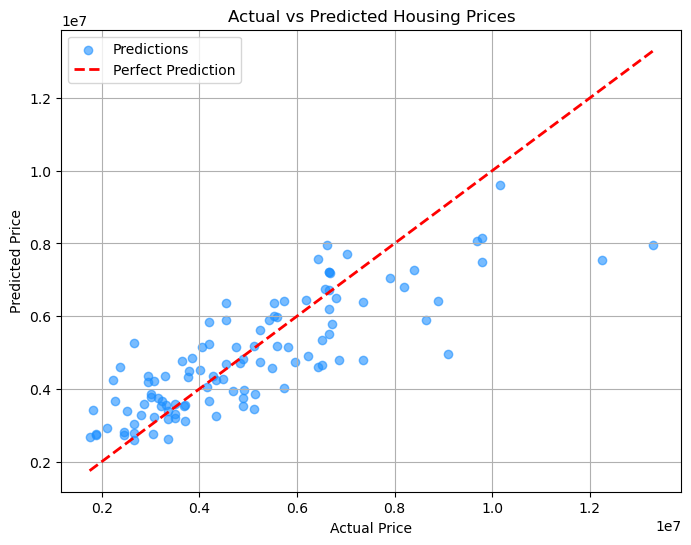

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Predict
y_pred = model.predict(x_test)

# Metrics
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="dodgerblue", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="red", linewidth=2, linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Housing Prices")
plt.legend()
plt.grid(True)
plt.show()

# Heatmap of Feature Correlation (Before Mondeling)

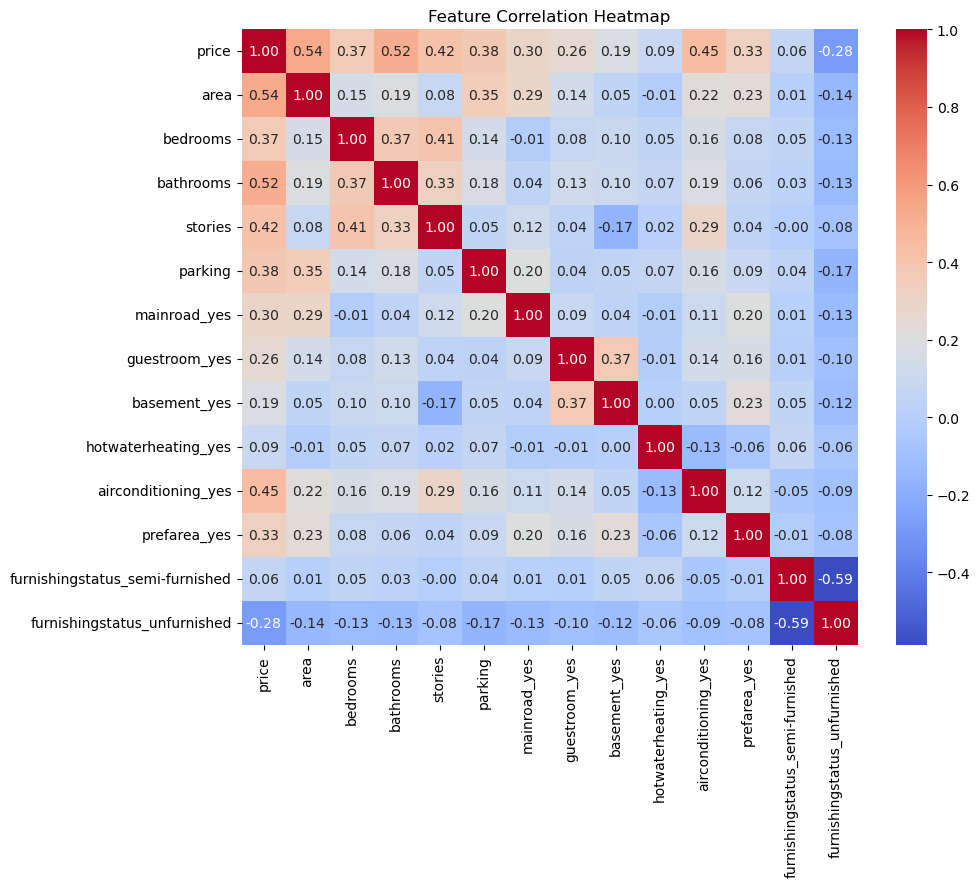

In [21]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# Predict using Saved Model

In [22]:
# Load model and column info
model = joblib.load("model.pkl")
model_columns = joblib.load("model_columns.pkl")

# Example input (must match the structure of model_columns)
sample_data = {
    'area': 2870,
    'bedrooms': 5,
    'bathrooms': 2,
    'stories': 4,
    'mainroad_yes': 1,
    'guestroom_yes': 0,
    'basement_yes': 1,
    'hotwaterheating_yes': 0,
    'airconditioning_yes': 1,
    'parking': 4,
    'prefarea_yes': 1,
    'furnishingstatus_semi-furnished': 1,
    'furnishingstatus_unfurnished': 0
}

# Create input DataFrame
input_df = pd.DataFrame([sample_data], columns=model_columns)

# Predict
predicted_price = model.predict(input_df)[0]
print(f"Predicted price: {predicted_price:.2f}")

Predicted price: 8091926.55
